# Pulsar Star Analysis
#### Members
##### Alex Lee, Lavender Yu, Brian Kong, Ayasha Abdalla-Wyse

# Introduction

Pulsars are highly magnetic neutron stars that emit periodic radio frequencies. They are “dead stars” that are larger than the sun, run out of fuel and collapse themselves. They are used to test general relativity[1], and map gravitational wave signatures[2]. However, there are lots of man-made sources of radio frequency interferences that mimic the pulsars’ signals. From our HTRU2 data set which “describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey”, we want to know whether the source of the radiation is a pulsar or noise.

Our dataset contains 16,259 spurious examples caused by RFI/noise and 1,639 real pulsar examples. The integrated profile (IP) is created by stacking individual bursts of emission from a pulsar[3], but because the pulse arrives at different times across different radio frequencies, scientists account for this via the DM-SNR curve[4].

The variables (appears once each for the IP and DM-SNR curve) are:

* Mean
* Standard Deviation
* Excess kurtosis
* Skewness 

### Preliminary exploratory data analysis:

In [7]:
library(tidyverse)
library(repr)
library(tidymodels)
library(caret)
library("GGally")
library(gridExtra) 
options(repr.matrix.max.rows = 6)

### Activity #1: Explore Datasets - Preliminary

#### Questions:
* What is the dataset about?
* How many variables are there?
* How many observations are there?

In [8]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip"

temp <- tempfile()
temp_2 <- tempfile()

download.file(url, temp)
unzip(zipfile = temp, exdir = temp_2)

pulsar <- read_csv(file.path(temp_2, "HTRU_2.csv"), 
                   col_names = c("Mean.of.the.integrated.profile", "Standard.deviation.of.the.integrated.profile", 
                                 "Excess.kurtosis.of.the.integrated.profile", "Skewness.of.the.integrated.profile",
                                "Mean.of.the.DM.SNR.curve", "Standard.deviation.of.the.DM.SNR.curve",
                                "Excess.kurtosis.of.the.DM.SNR.curve", "Skewness.of.the.DM.SNR.curve",
                                "target_class")) 

pulsar

Parsed with column specification:
cols(
  Mean.of.the.integrated.profile = col_double(),
  Standard.deviation.of.the.integrated.profile = col_double(),
  Excess.kurtosis.of.the.integrated.profile = col_double(),
  Skewness.of.the.integrated.profile = col_double(),
  Mean.of.the.DM.SNR.curve = col_double(),
  Standard.deviation.of.the.DM.SNR.curve = col_double(),
  Excess.kurtosis.of.the.DM.SNR.curve = col_double(),
  Skewness.of.the.DM.SNR.curve = col_double(),
  target_class = col_double()
)



Mean.of.the.integrated.profile,Standard.deviation.of.the.integrated.profile,Excess.kurtosis.of.the.integrated.profile,Skewness.of.the.integrated.profile,Mean.of.the.DM.SNR.curve,Standard.deviation.of.the.DM.SNR.curve,Excess.kurtosis.of.the.DM.SNR.curve,Skewness.of.the.DM.SNR.curve,target_class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
140.5625,55.68378,-0.2345714,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.5078,58.88243,0.4653182,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.0156,39.34165,0.3233284,1.0511644,3.121237,21.74467,7.735822,63.17191,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
119.3359,59.93594,0.1593631,-0.74302540,21.430602,58.87200,2.499517,4.595173,0
114.5078,53.90240,0.2011614,-0.02478884,1.946488,13.38173,10.007967,134.238910,0
57.0625,85.79734,1.4063910,0.08951971,188.306020,64.71256,-1.597527,1.429475,0


#### Answer:
Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter. Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted,which treat the candidate data sets as binary classification problems.

The columns of this dataset are:

- `Mean.of.the.integrated.profile` - Mean of the integrated profile
- `Standard.deviation.of.the.integrated.profile` - Standard deviation of the integrated profile
- `Excess.kurtosis.of.the.integrated.profile` - Excess kurtosis of the integrated profile
- `Skewness.of.the.integrated.profile` - Skewness of the integrated profile
- `Mean.of.the.DM.SNR.curve` - Mean of the DM-SNR curve. 
- `Standard.deviation.of.the.DM.SNR.curve` - Standard deviation of the DM-SNR curve
- `Excess.kurtosis.of.the.DM.SNR.curve` - Excess kurtosis of the DM-SNR curve
- `Skewness.of.the.DM.SNR.curve` - Skewness of the DM-SNR curve
- `target_class` - Class

The original dataset can be acquired here:
* https://www.kaggle.com/colearninglounge/predicting-pulsar-starintermediate
* https://archive.ics.uci.edu/ml/datasets/HTRU2

There are 9 variables and 12529 observations within this dataset. 

### Activity #2: Explore Datasets Part 2 - Outcome Variable

#### Questions:
* Identify the main outcome/categorical/label variable in the dataset.
* How many values/groups are in this variable?
* How many observations are there in each value/group?

In [9]:
pulsar <- pulsar %>%
        mutate(target_class = as_factor(target_class))
pulsar

Mean.of.the.integrated.profile,Standard.deviation.of.the.integrated.profile,Excess.kurtosis.of.the.integrated.profile,Skewness.of.the.integrated.profile,Mean.of.the.DM.SNR.curve,Standard.deviation.of.the.DM.SNR.curve,Excess.kurtosis.of.the.DM.SNR.curve,Skewness.of.the.DM.SNR.curve,target_class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.5625,55.68378,-0.2345714,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.5078,58.88243,0.4653182,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.0156,39.34165,0.3233284,1.0511644,3.121237,21.74467,7.735822,63.17191,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
119.3359,59.93594,0.1593631,-0.74302540,21.430602,58.87200,2.499517,4.595173,0
114.5078,53.90240,0.2011614,-0.02478884,1.946488,13.38173,10.007967,134.238910,0
57.0625,85.79734,1.4063910,0.08951971,188.306020,64.71256,-1.597527,1.429475,0


#### Answers:
* The main outcome/categorical/label variable would be "target_class".
* There are two groups in this variable, 0.0 and 1.0.
* There are 12529 observations.

### Activity #3: Explore Datasets Part 3 - Visualisations!

In [10]:
set.seed(2021)

pulsar_split <- initial_split(pulsar, prop = 0.75, strata = target_class)  
pulsar_train <- training(pulsar_split)   
pulsar_test <- testing(pulsar_split)

glimpse(pulsar_train)

Rows: 13,424
Columns: 9
$ Mean.of.the.integrated.profile               <dbl> 140.56250, 102.50781, 10…
$ Standard.deviation.of.the.integrated.profile <dbl> 55.68378, 58.88243, 39.3…
$ Excess.kurtosis.of.the.integrated.profile    <dbl> -0.23457141, 0.46531815,…
$ Skewness.of.the.integrated.profile           <dbl> -0.69964840, -0.51508791…
$ Mean.of.the.DM.SNR.curve                     <dbl> 3.1998328, 1.6772575, 3.…
$ Standard.deviation.of.the.DM.SNR.curve       <dbl> 19.110426, 14.860146, 21…
$ Excess.kurtosis.of.the.DM.SNR.curve          <dbl> 7.975532, 10.576487, 7.7…
$ Skewness.of.the.DM.SNR.curve                 <dbl> 74.24222, 127.39358, 63.…
$ target_class                                 <fct> 0, 0, 0, 0, 0, 0, 0, 0, …


In [11]:
scale_transformer <- preProcess(pulsar_train, method = c("center", "scale"))

sd_training_set <- predict(scale_transformer, pulsar_train)
sd_testing_set <- predict(scale_transformer, pulsar_test)

In [12]:
pulsar_table <- sd_training_set %>%
    mutate(na_count = apply(sd_training_set, 1, function(x) sum(is.na(x)))) %>%
                            group_by(target_class) %>%
                            summarize(n = n(), 
                                      percentage = n() / nrow(pulsar_train) * 100,
                                      na_count = sum(na_count))
    cat("Table 1: Summary of Data Set")
    pulsar_table

`summarise()` ungrouping output (override with `.groups` argument)



Table 1: Summary of Data Set

target_class,n,percentage,na_count
<fct>,<int>,<dbl>,<int>
0,12179,90.725566,0
1,1245,9.274434,0


For the exploratory data analysis, we used the ggpairs function from GGally library to visualize the distributions of each predictor variables in our trianing data set [Figure 1].

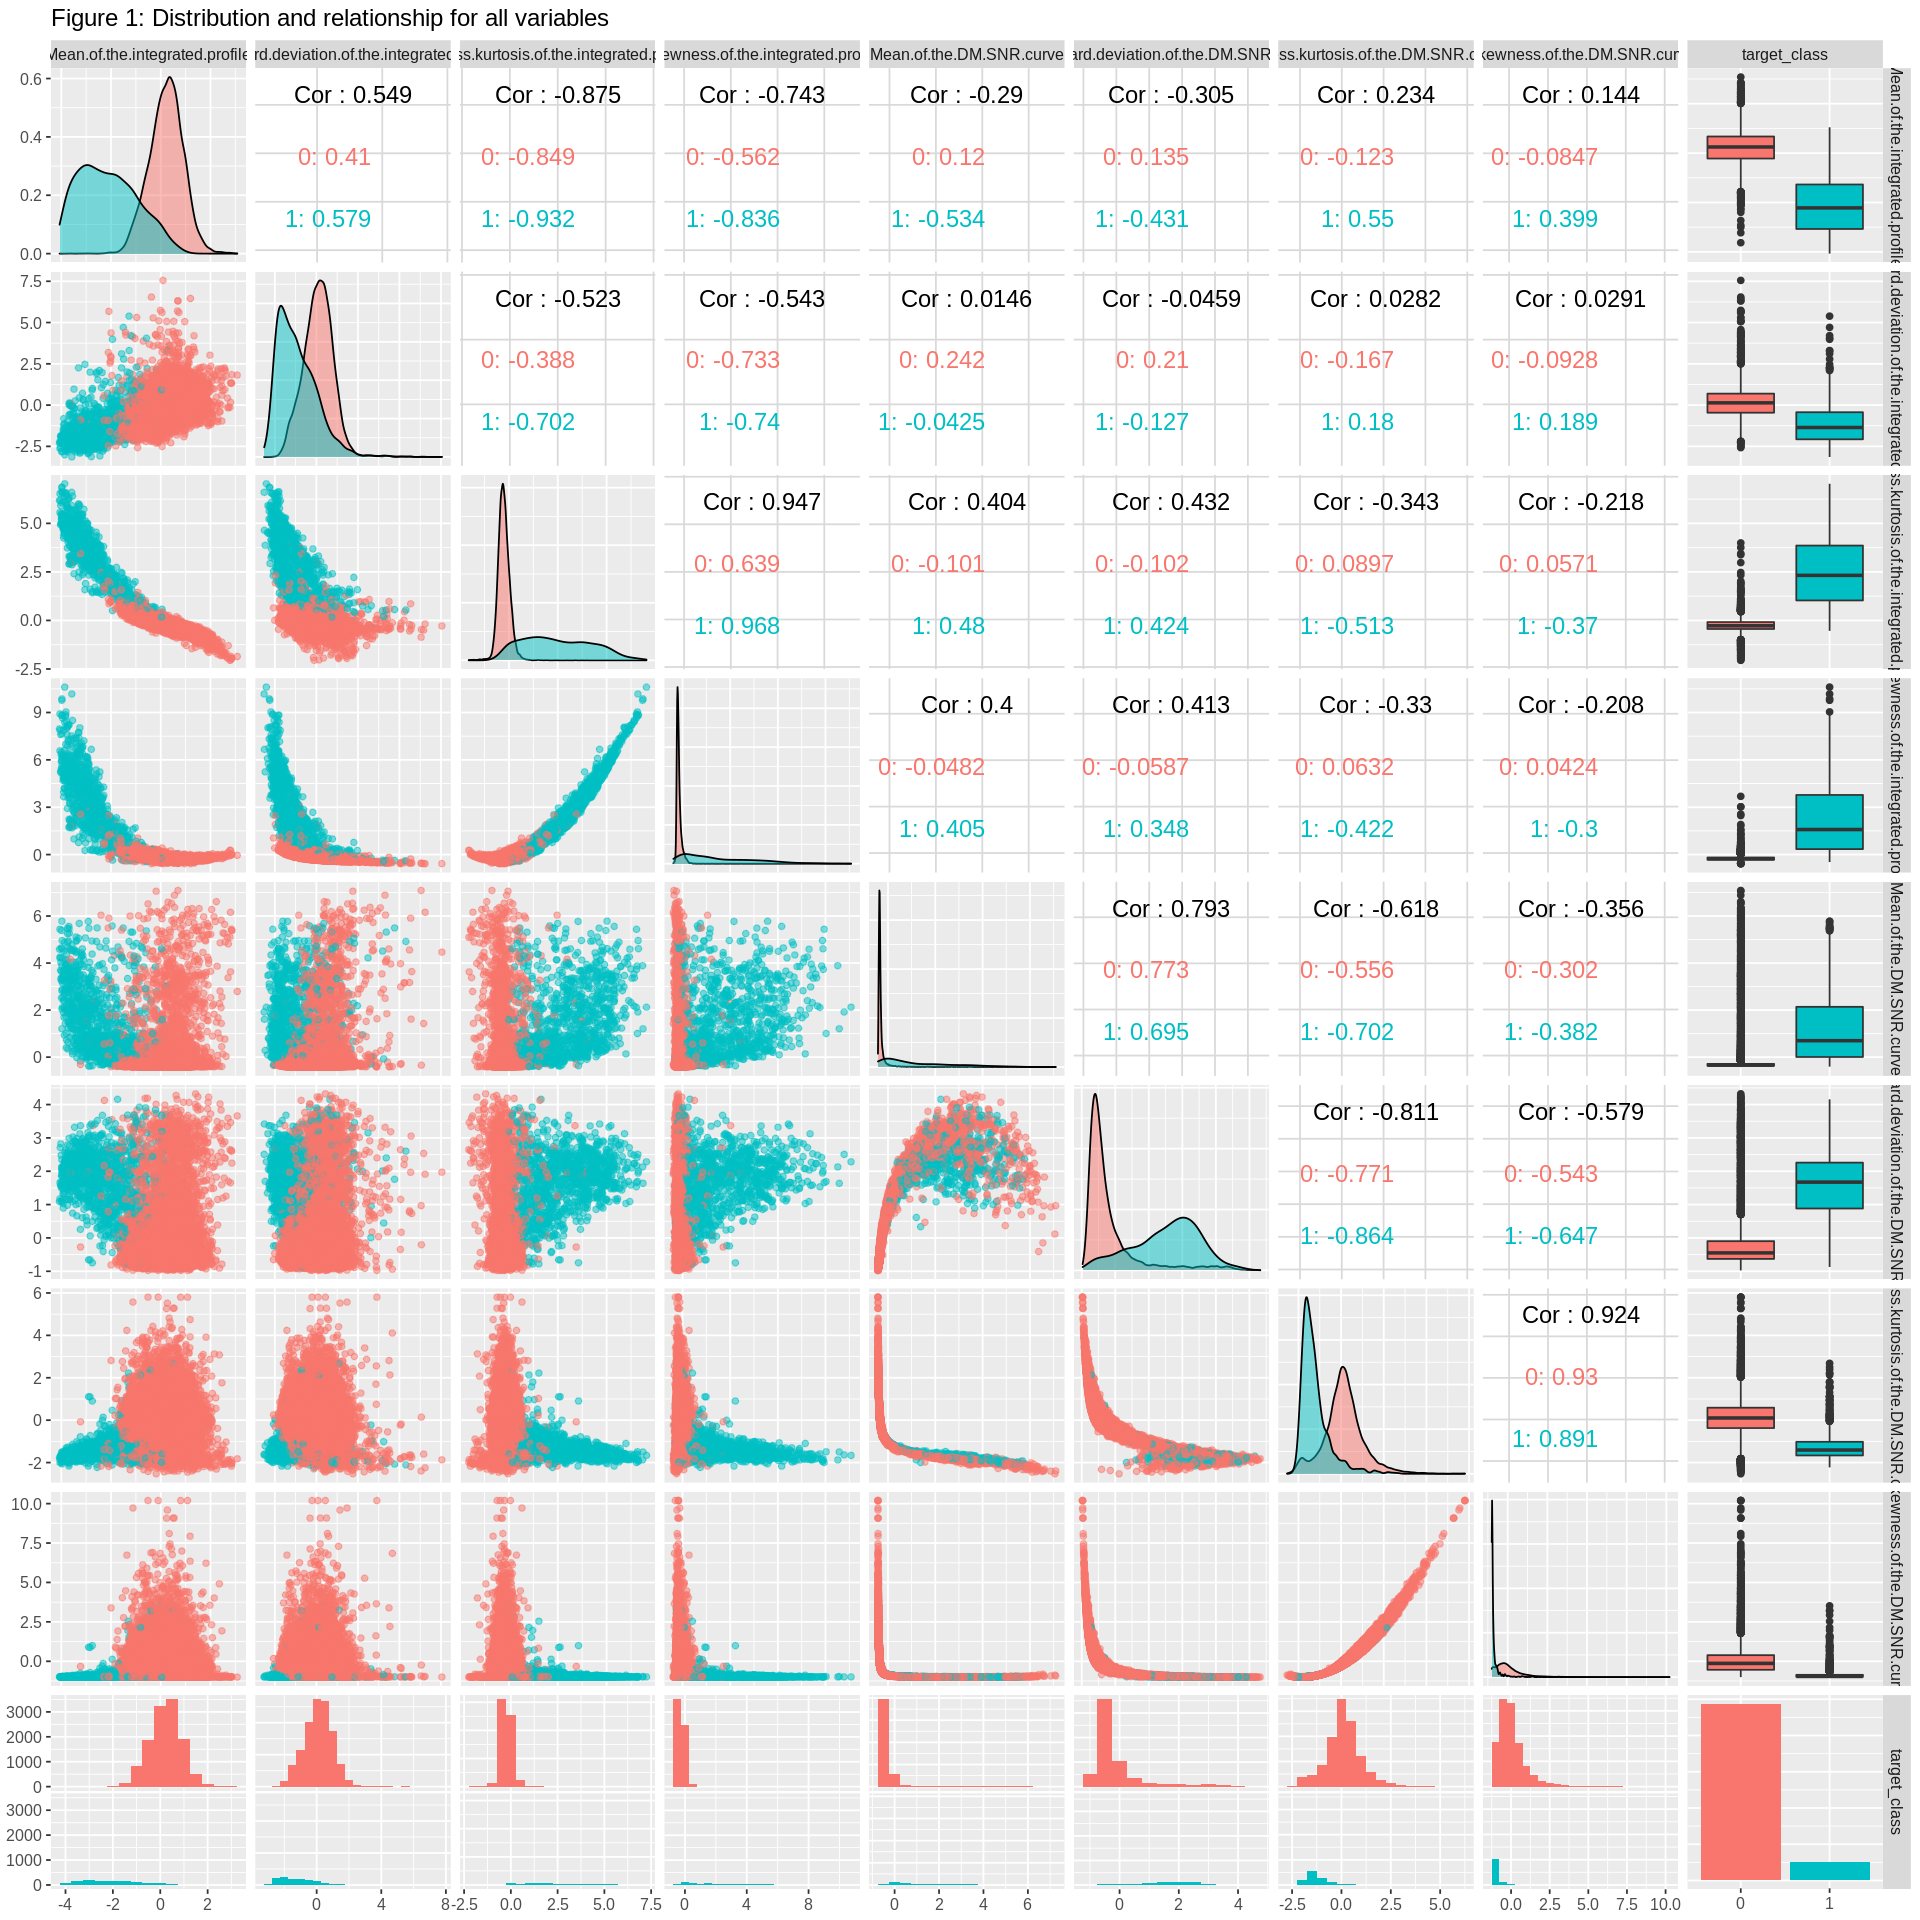

In [13]:
options(repr.plot.width = 16, repr.plot.height = 16)
pulsar_plot <- ggpairs(data = sd_training_set, mapping=ggplot2::aes(colour = target_class), 
    upper = list(continuous = wrap("cor", size = 5)),
    lower = list(continuous = wrap("points", alpha = 0.5), combo=(wrap("facethist", binwidth = 0.5))),
    diag = list(continuous = wrap("densityDiag", alpha = 0.5)),
    title = "Figure 1: Distribution and relationship for all variables") +
    theme(text = element_text(size=12))
pulsar_plot

To help distinguish predictors from our classification model, we extract the histogram plots below [Figure 1.1] to see the distribution of each variable and whether it can help us distinguish each class well. From these plots, we can see that the second, seventh, and eighth variables have a relatively similar shape of the distribution for each class. Moreover, we see that these three variables have relatively large overlapped areas between both classes from the diagonal plots [Figure 1.2]. Hence, we decided to opt-out standard deviation of the integrated profile, excess kurtosis of the DM-SNR curve, and skewness of the DM-SNR curve.

Besides, this ggpair graph gives us some intuition that the first and sixth predictors are relatively good predictors based on the distribution shape of each class in the histogram. Moreover, the third variable should be a good predictor because the histogram distribution shows that the distribution of each class is very different, and the density graph shows a relatively small overlapped area. Also, the fourth and fifth predictors are relatively good predictors based on small overlaps in the density graph. 

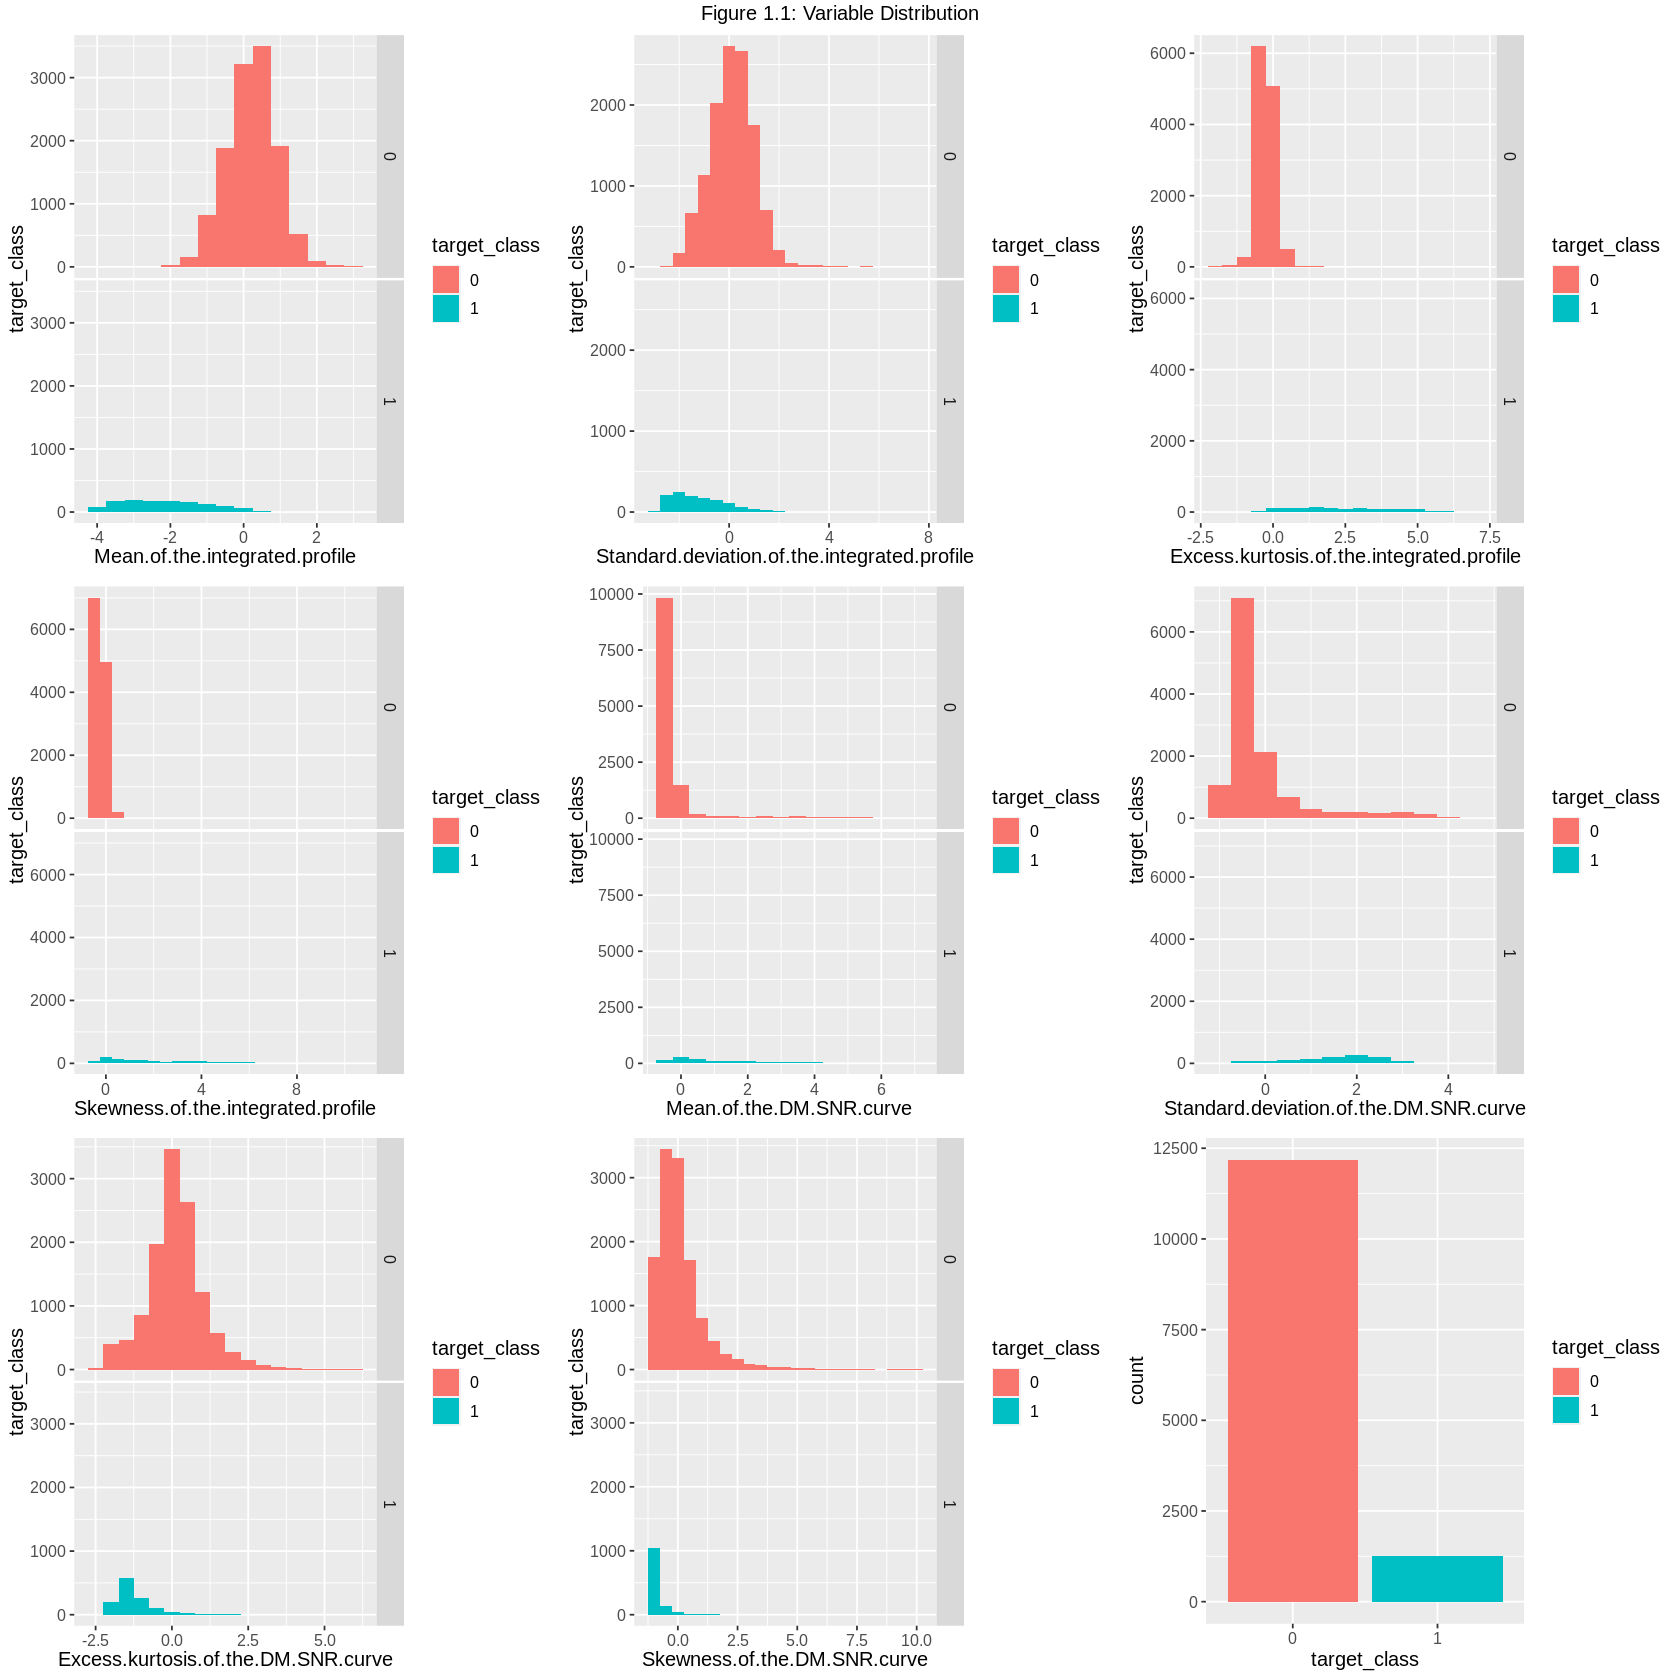

In [9]:
options(repr.plot.width = 14, repr.plot.height = 14)
grid.arrange(getPlot(pulsar_plot, 9,1), getPlot(pulsar_plot, 9,2), getPlot(pulsar_plot, 9,3),
             getPlot(pulsar_plot, 9,4), getPlot(pulsar_plot, 9,5), getPlot(pulsar_plot, 9,6),
             getPlot(pulsar_plot, 9,7), getPlot(pulsar_plot, 9,8), getPlot(pulsar_plot, 9,9), nrow = 3, top = "Figure 1.1: Variable Distribution")

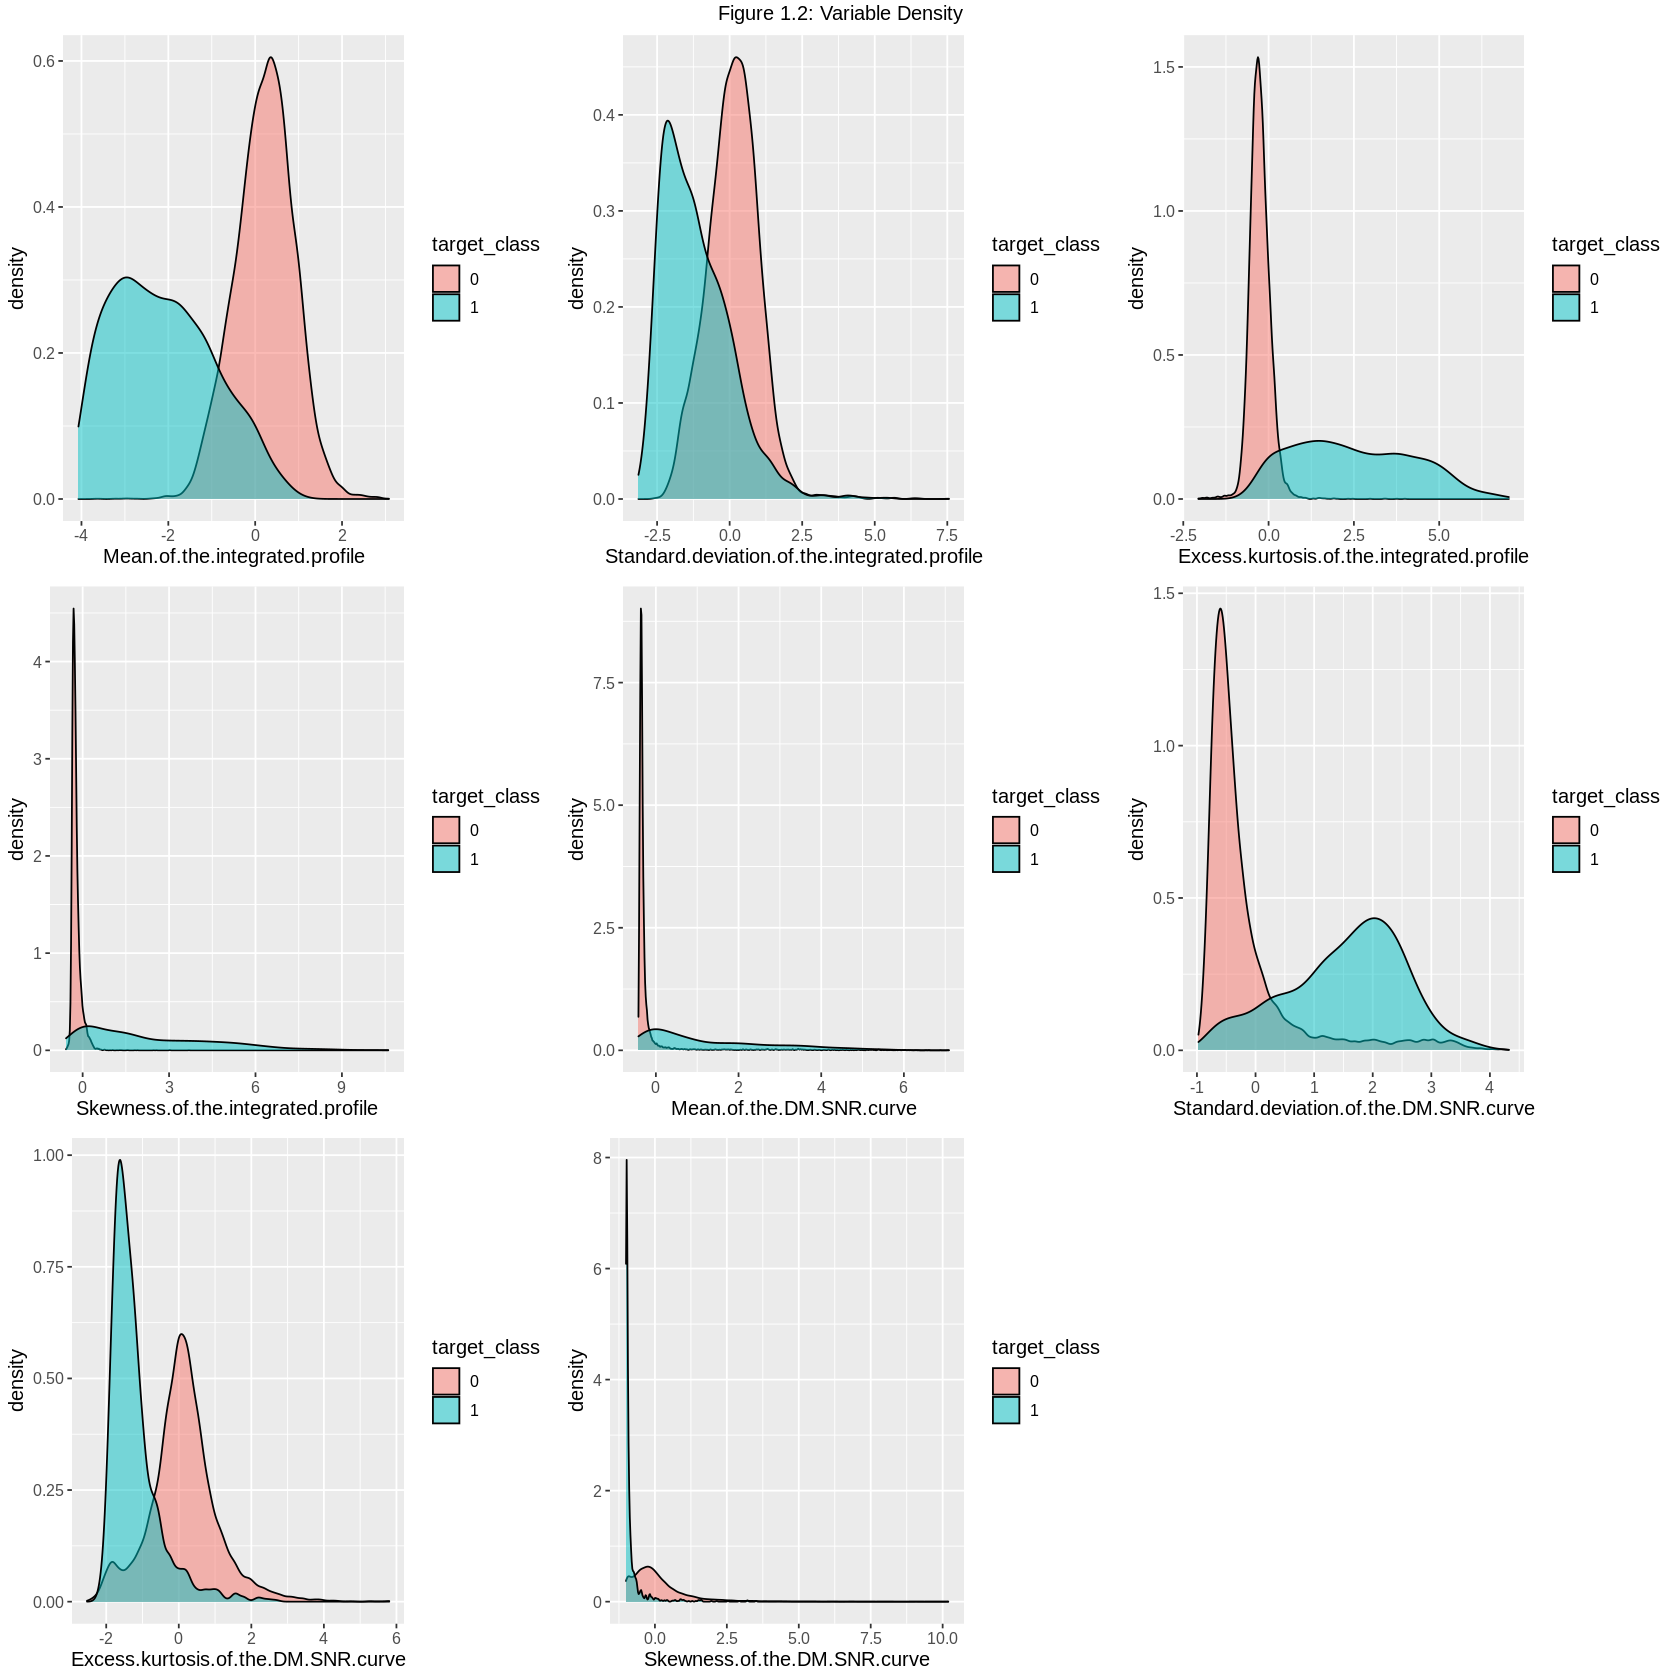

In [10]:
options(repr.plot.width = 14, repr.plot.height = 14)
grid.arrange(getPlot(pulsar_plot, 1,1), getPlot(pulsar_plot, 2,2), getPlot(pulsar_plot, 3,3),
             getPlot(pulsar_plot, 4,4), getPlot(pulsar_plot, 5,5), getPlot(pulsar_plot, 6,6),
             getPlot(pulsar_plot, 7,7), getPlot(pulsar_plot, 8,8), nrow = 3,  top = "Figure 1.2: Variable Density")

Splitting data into training and test set:

In [14]:
head(pulsar)

Mean.of.the.integrated.profile,Standard.deviation.of.the.integrated.profile,Excess.kurtosis.of.the.integrated.profile,Skewness.of.the.integrated.profile,Mean.of.the.DM.SNR.curve,Standard.deviation.of.the.DM.SNR.curve,Excess.kurtosis.of.the.DM.SNR.curve,Skewness.of.the.DM.SNR.curve,target_class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.56250,55.68378,-0.23457141,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.50781,58.88243,0.46531815,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.01562,39.34165,0.32332837,1.0511644,3.121237,21.74467,7.735822,63.17191,0
136.75000,57.17845,-0.06841464,-0.6362384,3.642977,20.95928,6.896499,53.59366,0
88.72656,40.67223,0.60086608,1.1234917,1.178930,11.46872,14.269573,252.56731,0
93.57031,46.69811,0.53190485,0.4167211,1.636288,14.54507,10.621748,131.39400,0


In [4]:
set.seed(2021)

pulsar_split <- initial_split(pulsar, prop = 0.75, strata = target_class)  
pulsar_train <- training(pulsar_split)   
pulsar_test <- testing(pulsar_split)

pulsar_recipe <- recipe(target_class ~ Mean.of.the.integrated.profile + Excess.kurtosis.of.the.integrated.profile + 
                          Skewness.of.the.integrated.profile + Mean.of.the.DM.SNR.curve + Standard.deviation.of.the.DM.SNR.curve, data = pulsar_train) %>%
   step_scale(all_predictors()) %>%
   step_center(all_predictors())

Cross-validation:

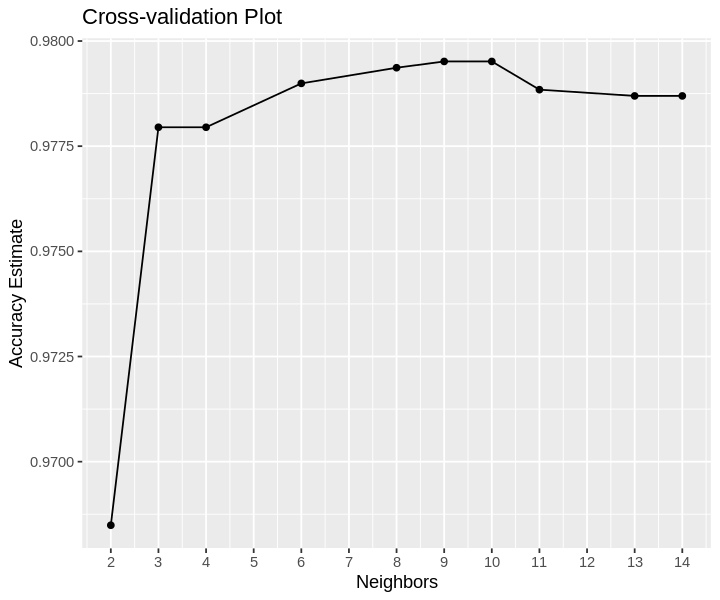

In [14]:
set.seed(2021)

options(repr.plot.height = 5, repr.plot.width = 6)

training_vfold <- vfold_cv(pulsar_train, v = 5, strata = target_class)

training_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
            set_engine("kknn") %>%
            set_mode("classification")

knn_results <- workflow() %>%
    add_recipe(pulsar_recipe) %>%
    add_model(training_tune) %>%
    tune_grid(resamples = training_vfold, grid = 10) %>%
    collect_metrics()

accuracies <- knn_results %>% 
      filter(.metric == "accuracy")

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 14, by = 1)) +
      ggtitle("Cross-validation Plot")
cross_val_plot

K = 10 provides the highest accuracy.

In [15]:
set.seed(2021)
mpulsar_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 10) %>%
    set_engine("kknn") %>%
    set_mode("classification")

mpulsar_fit <- workflow() %>%
      add_recipe(pulsar_recipe) %>%
      add_model(mpulsar_spec) %>%
      fit(pulsar_train)

mpulsar_predictions <- predict(mpulsar_fit, pulsar_train) %>%
    bind_cols(pulsar_train)
mpulsar_predictions

mpulsar_metrics <- mpulsar_predictions %>%
        metrics(truth = target_class, estimate = .pred_class) 
mpulsar_metrics

mpulsar_conf_mat <- mpulsar_predictions %>% 
      conf_mat(truth = target_class, estimate = .pred_class)
mpulsar_conf_mat

.pred_class,Mean.of.the.integrated.profile,Standard.deviation.of.the.integrated.profile,Excess.kurtosis.of.the.integrated.profile,Skewness.of.the.integrated.profile,Mean.of.the.DM.SNR.curve,Standard.deviation.of.the.DM.SNR.curve,Excess.kurtosis.of.the.DM.SNR.curve,Skewness.of.the.DM.SNR.curve,target_class
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,140.5625,55.68378,-0.2345714,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
0,102.5078,58.88243,0.4653182,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
0,103.0156,39.34165,0.3233284,1.0511644,3.121237,21.74467,7.735822,63.17191,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0,119.3359,59.93594,0.1593631,-0.74302540,21.430602,58.87200,2.499517,4.595173,0
0,114.5078,53.90240,0.2011614,-0.02478884,1.946488,13.38173,10.007967,134.238910,0
0,57.0625,85.79734,1.4063910,0.08951971,188.306020,64.71256,-1.597527,1.429475,0


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9810787
kap,binary,0.8818562


          Truth
Prediction     0     1
         0 12119   194
         1    60  1051

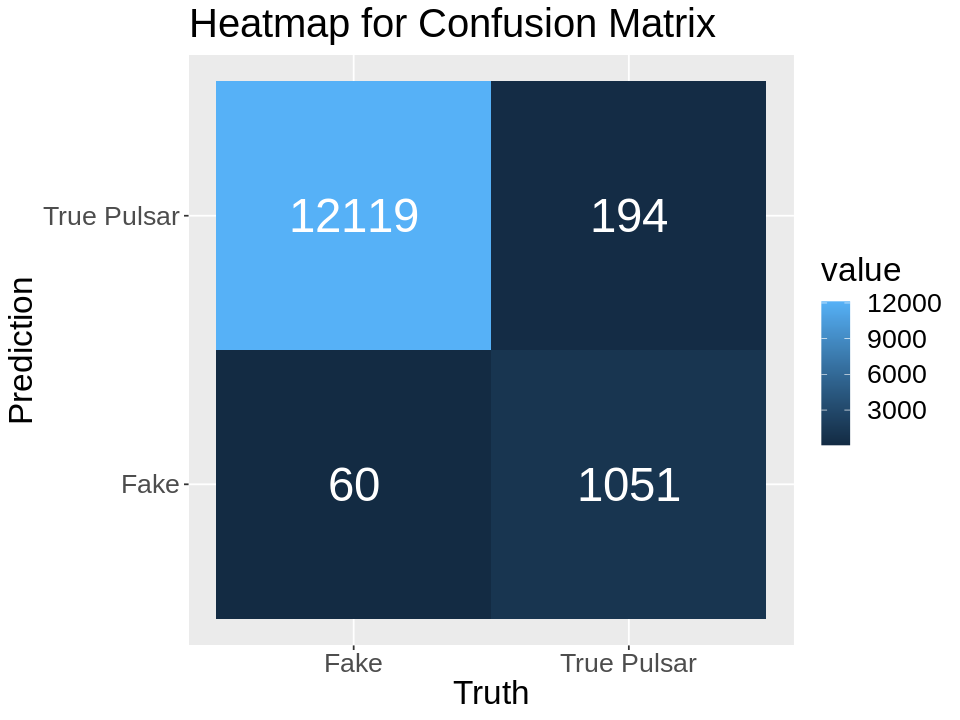

In [19]:
hm <- tibble(x=c("Fake","Fake","True Pulsar","True Pulsar"), y=c("True Pulsar","Fake","True Pulsar","Fake"),value=c(12119,60,194,1051))
options(repr.plot.width = 8, repr.plot.height = 6)
Heatmap <- ggplot(hm, aes(x=x, y=y, fill=value)) + 
geom_tile()+
labs(x="Truth", y="Prediction",title="Heatmap for Confusion Matrix") +
theme(text = element_text(size = 20)) +
geom_text(aes(label=value), color="white", size = 10) 

Heatmap

### Methods

We can take the `Mean.of.the.integrated.profile`, the `Excess.kurtosis.of.the.integrated.profile`, and the `Skewness.of.the.integrated.profile`, `Mean.of.the.DM.SNR.curve`, the `Standard.deviation.of.the.DM.SNR.curve` as predictors. The graphs above show the variables of the pulsar and noise had significant differences, which could help the prediction.

We cannot take the `Standard.deviation.of.the.integrated.profile`,  the `Excess.kurtosis.of.the.DM.SNR.curve`, and the `Skewness.of.the.DM.SNR.curve` as predictors. These variables of the noise overlap significantly with the pulsars, so the prediction will not be able to find the pulsar. Although there are some small differences, it still cannot eliminate the effect of the large numbers brought by the noise.

We used the pulsar data train dataset by taking the mean, excess kurtosis, skewness of the IP and mean, standard deviation of the DM.SNR curve. With these variables, we can improve our classification accuracy when we are trying to predict the class at a certain point. We chose these variables because the IP is a key characteristic used in determining whether the signal is a pulsar or noise. 

Further improvements can be made by splitting our data into training and testing sets so that they can be used in cross-validation to obtain the k value that provides the highest accuracy. We will pre-process the training dataset to standardize the predictors through the recipe function. After tuning our model specification, we will have the k value that gives the highest accuracy, which will allow our classifier to predict whether a new observation is most likely a noise or a pulsar.

We visualize the accuracy of our classification by using a confusion matrix, which will show how many observations were correctly labelled from the testing dataset.

### Discussion

#### Summary
In the classification of the Pulsar star, 12119 (99.51%) radio frequencies were correctly predicted as the man-made sources of radiofrequency. 1051 (84.42%) radio frequencies were correctly predicted as the true pulsar star. In addition, 60 (0.49%) radio frequencies are categorized as pulsars, but it is of man-made sources. And 194 (15.58%) radio frequencies were incorrectly classified as man-made sources. In the end, the accuracy of the algorithm of the test data set reached 98.11%.

#### Expected Outcome
Our goal was to reach a confident prediction of whether or not the frequency we want to determine is a pulsar star or a man-made source. After cross-validating to find the optimal K-value for our model and using a confusion matrix along with a heatmap, we found that 13095 out of 13424 frequencies were correctly identified with an accuracy of 98.11%. Since we expected that a cross-validation would result in a more accurate model, the final outcome with a higher accuracy value was what our group expected to find.

#### Impact of this Find
With our classifier, we can identify with high accuracy whether a frequency is a pulsar or noise. This will be useful in exploring datasets containing new unknown signals that could be pulsars. The classifier will identify pulsar candidates that can be studied further in the field of astronomy. This opens up several further potential analyses and questions that can be asked about pulsars.

### Drawbacks of class imbalance:
A potential problem with our dataset is class imbalance.  Given our training data, 91% of the observations were not classified as pulsar stars, while 9% were classified as pulsar stars.  Because the K-nearest neighbour algorithm works by searching for the labels of the nearby points to predict the label of a new observation point, the algorithm is more likely to pick the non-pulsar stars in general.  In our training data, pulsar stars are the rare “unimportant” class, which may lead to “unfair” predictions in our classification analysis (potential bias). When we do upsampling, we replicate the existing observation of the rare case - pulsar stars. This may impact our cross-validation and make our estimation over-optimistic.

#### Future Questions
- Can we use machine learning to identify other objects in space such as black holes?
- Are there other variables that are decisive factors in classifying if the given radio emission is caused by a pulsar or not


### References

1. Kramer, M., Backer, D. C., Cordes, J. M., Lazio, T. J. W., Stappers, B. W., & Johnston, S. (2004, October 28). Strong-field tests of gravity using pulsars and black holes. New Astronomy Reviews. Retrieved November 7, 2021, from https://www.sciencedirect.com/science/article/pii/S1387647304000909.


2. Gravitational wave - Public Website. (2021). Retrieved 7 November 2021, from https://www.skatelescope.org/newsandmedia/outreachandeducation/skawow/gravitational-wave/


3. Ias.ac.in. (2021). Retrieved 7 November 2021, from https://www.ias.ac.in/article/fulltext/joaa/001/02/0119-0128.


4. Core.ac.uk. (2021). Retrieved 7 November 2021, from https://core.ac.uk/download/pdf/84412129.pdf.
